# Implementation and comparison of several noise filters

This notebook goal is to compare different type of filter with different kernels:

- Average

- Gaussian

- Median

Instructions:

We will use a function that takes an image as input and the parameters of this filter and creates the filtered image as output. 

We will then apply these filters to the different noisy images to compare their performance and the most effective settings. These filters will be applied to the well-known Lena image on which several noises have been made. 


In [40]:
#importations cell
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import PIL as pil
from PIL import Image, ImageOps, ImageFilter

In [41]:
import os
#choose the directory where you put the images of Lena
os.getcwd ()
os.chdir ('/Users/nathanredin/Documents/Machine Learning/Cours _Vision') 

In [42]:
#We retrieve the initial images in variables

#Images PIL
im_init=pil.Image.open("lena_original.png")
im_bruit_gaussien=pil.Image.open("lena_bruit_gaussien.png")
im_poivre_et_sel=pil.Image.open("lena_poivre_et_sel.png")
im_speckle=pil.Image.open("lena_speckle.png")

#Numpy arrays
im_init_arr = np.array(im_init)
im_bg_arr = np.array(im_bruit_gaussien)
im_pes_arr = np.array(im_poivre_et_sel)
im_sp_arr = np.array(im_speckle)

#Creation of two lists with the PIL images and the np.arrays
imgs = [im_init, im_bruit_gaussien, im_poivre_et_sel, im_speckle]
arr = [im_bg_arr, im_pes_arr, im_sp_arr, im_init_arr]

default_titles = ['Gaussian noise', 'Pepper and salt', 'Speckle','Original']

## Creation of a function to display the image and its histogram:

In [43]:
#Function to display the images and their histograms:
def display_images(images, titles = default_titles):
    plt.clf(); plt.cla(); plt.close();
    f, axs = plt.subplots(1, len(images), figsize=(16,16))
    for i in range(len(images)):
        axs[i].imshow(images[i], cmap = plt.cm.gray)
        axs[i].set_title(titles[i])
        axs[i].axis('off')
    plt.tight_layout(pad=-2)
    plt.show()
    f, axs = plt.subplots(1, len(imgs), figsize=(18,3))
    for i in range(len(images)):
        axs[i].hist(images[i].flatten(), bins = range(256))
        axs[i].set_title(titles[i])
    plt.show()  


## Raw images (not filtered)

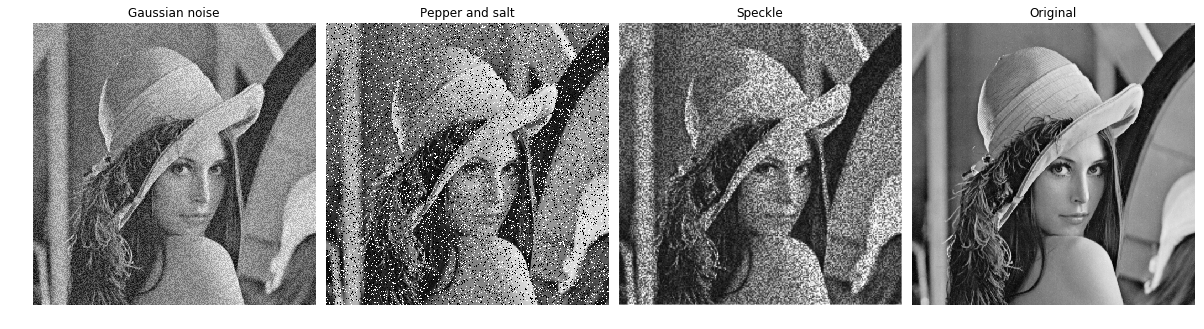

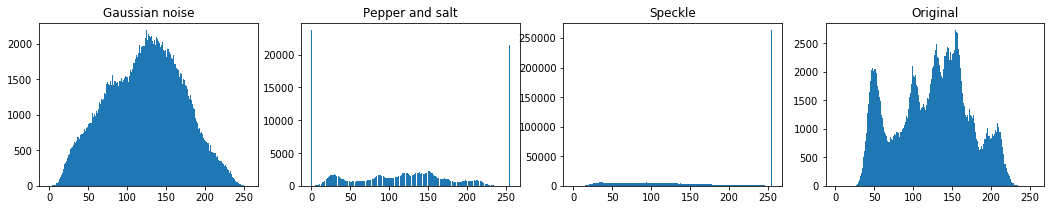

In [44]:
display_images(arr)

Unsurpisingly we can notice that the histogram of the different images seems to correspond to the noise:

- Gaussian repartition for a gaussian noise
- Mainly black and white pixels for a salt and pepper noise
- A peak level of white pixels for the speckle noise

## Gaussian filter

Radius : 1


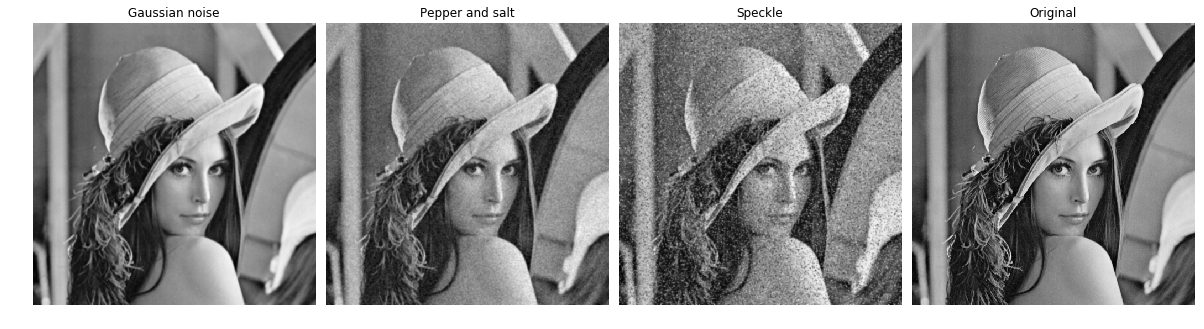

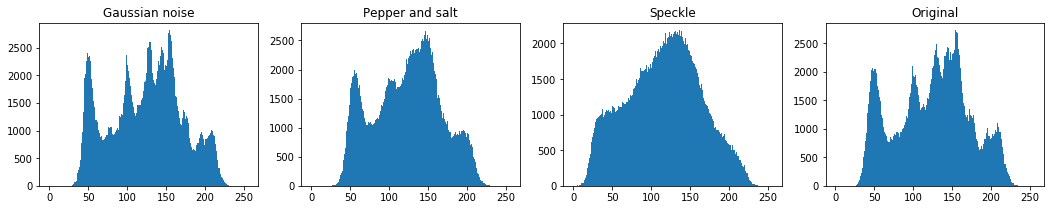

Radius : 2


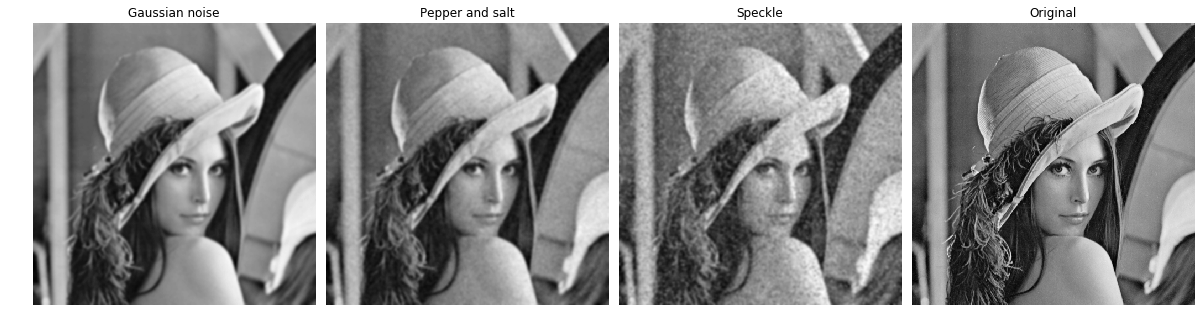

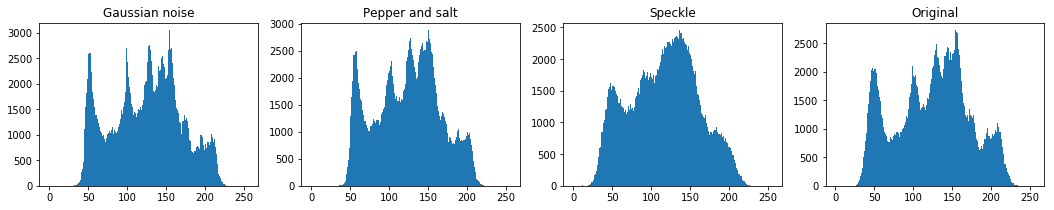

Radius : 3


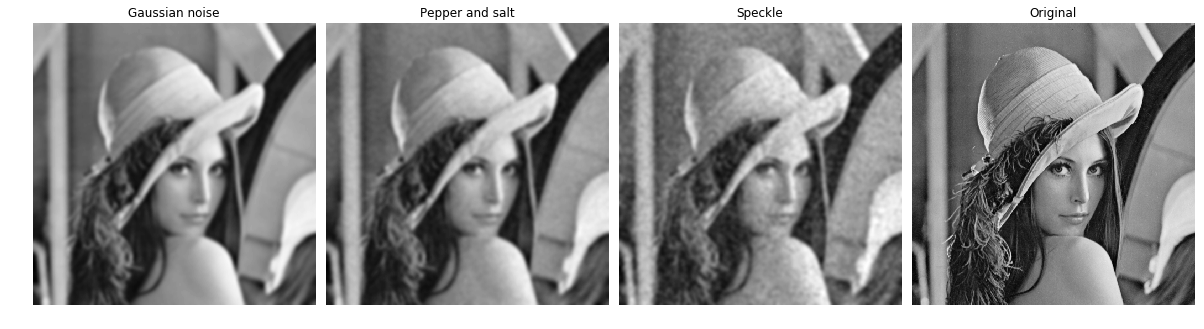

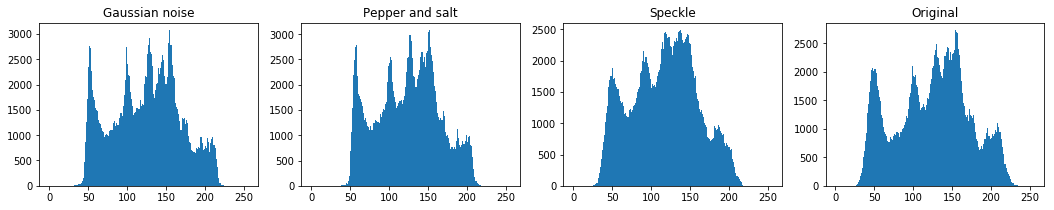

In [61]:
for i in range(1,4) :
    rad_GB = i
    print('Radius :', i)
    im_filterGB = [[],[],[],im_init_arr]
    for j in range(3) :
        im_filterGB[j] = np.array(imgs[j].filter(ImageFilter.GaussianBlur(radius = rad_GB)), dtype = "float")
    display_images(im_filterGB)


We can notice that the gaussian filter is quit efficient, especially with a gaussian and a pepper and salt noise.
The results are not as good on the speckle noise. 

It appears that the best parameter for this filter is a radius of 1. A more important radius makes the images blurred.

For the Speckle noise the results are better for a radius of 2.

## Mean Filter

Radius = 1


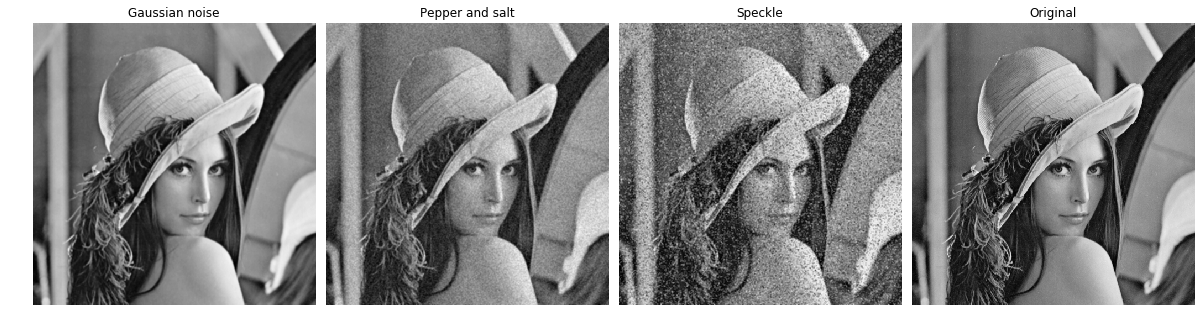

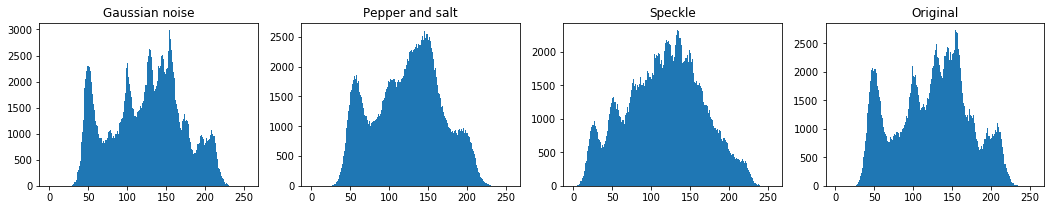

Radius = 2


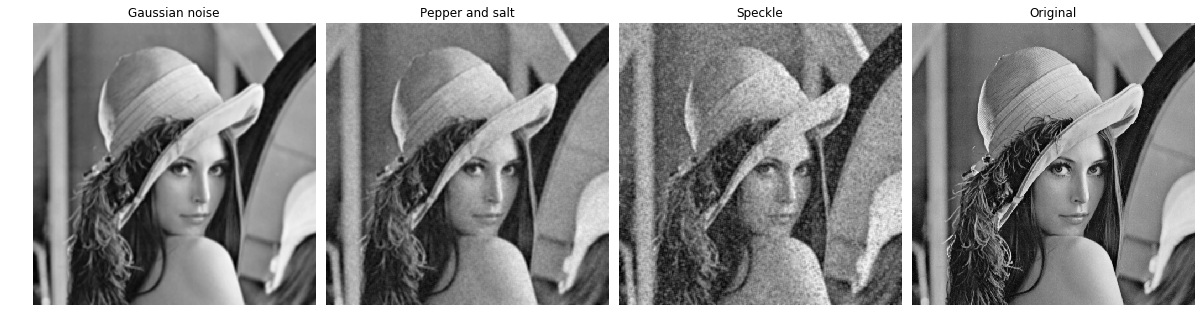

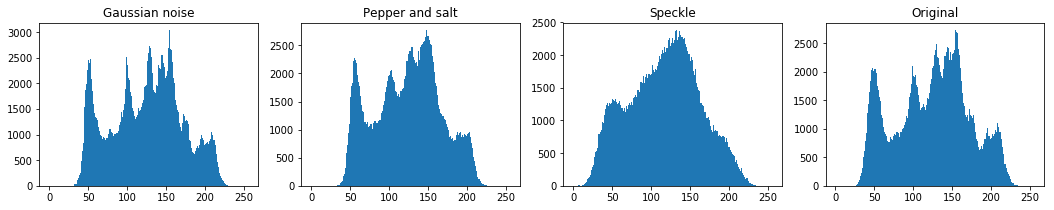

In [60]:
for i in range(1,3) :
    rad_Moy = i
    print('Radius =', i)
    im_filterMoy = [[],[],[],im_init_arr]
    for j in range(3) :
        im_filterMoy[j] = np.array(imgs[j].filter(ImageFilter.BoxBlur(radius = rad_Moy)), dtype = "float")
    display_images(im_filterMoy)

- Gaussian Noise: The filter is effective in softening this type of noise. A radius of 1 is sufficient to obtain a correct image. A radius of 2 tends to make the image more blurry without a siggnificant improvement. In both cases, the histogram is very close to the original.
- Pepper and Salt: The noise remains quite present in both cases but the filter still improves the situation. A radius of 2 allows to soften the image a little but we can notice a loss of sharpness. The histogram is close to the original.
- Speckle: Not surprisingly, noise remains very present in both cases. A radius of 2 may be necessary in this case to obtain a correct result despite the loss of sharpness.



## Median Filter

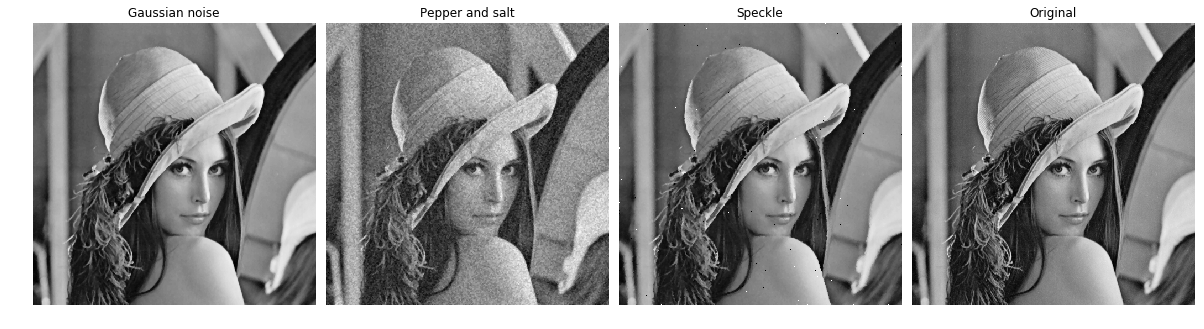

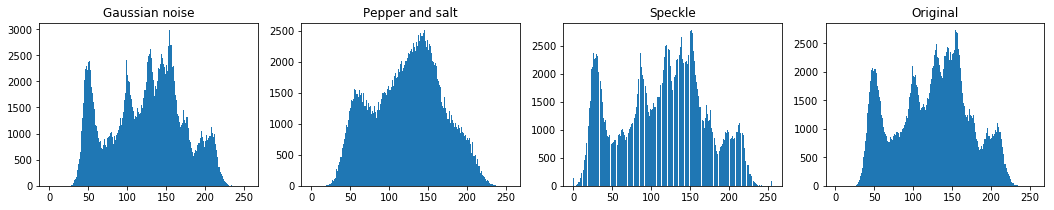

In [65]:
im_filterMed = [[],[],[],im_init_arr]
for j in range(3) :
    im_filterMed[j] = np.array(imgs[j].filter(ImageFilter.MedianFilter()), dtype = "float")
display_images(im_filterMed)


- Gaussian Noise: The filter works quit well but the image is a little blurred compared to an average filter with a radius=1
- Pepper and Salt: Here again, the filter is quite efficient but the image is rather blurry. The histogram is close to the original though
- Speckle: The image is noisy but still slightly sharper than with the other filters, and the histogram seems to be close to the original